# Homework 2: U.S. Boundary Currents

Name: Sherine Aldrin

Date: 09/02/24

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook

ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [3]:
# store the velocity components and longitude/latitude data
# into numpy arrays

evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])

lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

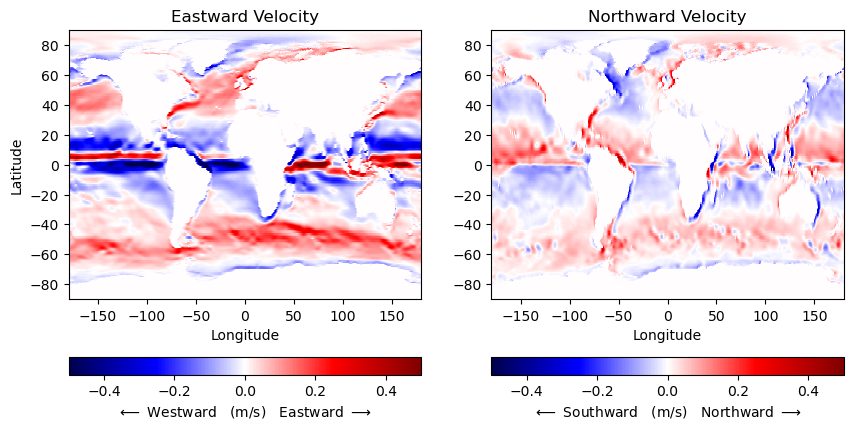

In [5]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');



### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# change this cell to a markdown and input your response here
1. At 30ºN on the east coast the currents are moving roughly northeast and also roughly southeast on the west coast.
2. At 45ºN on the east coast the currents are moving roughly southeast and also roughly southeast on the west coast. But really close to the coast, we can see that there is a current going northeast. But really close to the east coast, there is a westward current. For the majority if we consider the color next to both coasts though, my guesses are still southeast.

3. The east coast. We can tell since the colors are bolder on both graphs. The east current is specifically prominent and the south and northward currents as well.
4. They follow the general pattern of the gyres. For example, the gyre in the Pacific ocean flows in a clockwise direction. Same with the north atlantic gyre. The east and west current directions match up with the north and south to make the circle with white in the center.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [6]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_THETA = xr.open_dataset('THETA_2015_12.nc')

In [7]:
# store the THETA grid into a into numpy array

theta = np.array(ds_THETA['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

<function matplotlib.pyplot.show(close=None, block=None)>

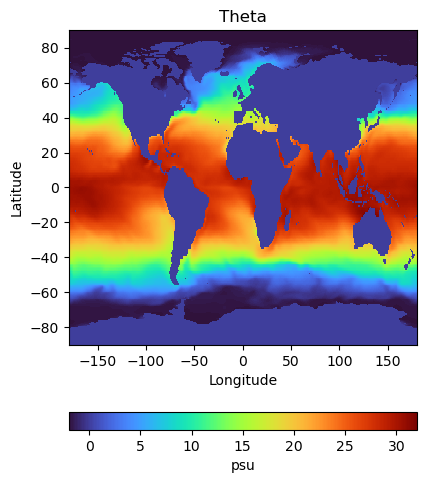

In [10]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='psu' )

plt.title('Theta');
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show


### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# change this cell to a markdown and input your response here
1. They are pretty similar from 40ºN to 80ºN, but the east coast is definitely warmer from 30ºN to 40ºN.
2. Ocean currents might contribute as on the west coast, cold water from the north pole flows in the clockwise direction bringing cold water to the west coast, and on the east coast, warm water from the Atlantic and near the equator flows up to the east coast.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [11]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_wvel = xr.open_dataset('WVELSTAR_2015_12.nc')

In [12]:
ds_wvel

<xarray.Dataset>
Dimensions:    (i: 720, j: 360, k_l: 50, time: 1, nv: 2)
Coordinates:
  * i          (i) int64 0 1 2 3 4 5 6 7 8 ... 712 713 714 715 716 717 718 719
  * j          (j) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * time       (time) datetime64[ns] 2015-12-16T12:00:00
    latitude   (j) float64 ...
    longitude  (i) float64 ...
    timestep   (time) int64 ...
    Zl         (k_l) float32 ...
    time_bnds  (time, nv) datetime64[ns] ...
Dimensions without coordinates: nv
Data variables:
    WVELSTAR   (time, k_l, j, i) float64 ...
Attributes: (12/20)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 4
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nz:                           50
    geospatial_vertical_units:    meter
    geospatial_vertical_max:      0.0
    date_created:                 Tue Aug 27 18:20:19 2019
    time_coverage_start:          2015-12-01T00:00:00
    time_coverage_end:            2016-01-01T00:00:00

In [13]:
# store the WVELSTAR grid into a into numpy array

wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [15]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

Zl = np.array(ds_wvel['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

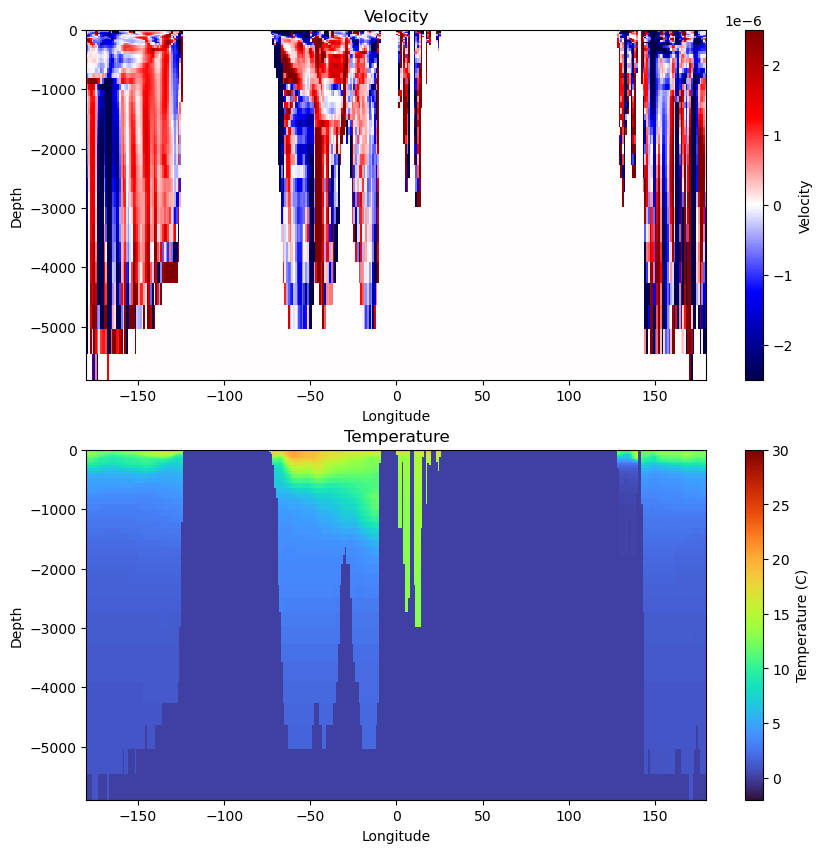

In [43]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)

C = plt.pcolormesh(lon,Zl,wvel[0, :, 259, :], vmin = -0.0000025, vmax=0.0000025, cmap='seismic')
plt.colorbar(C, label='Velocity' )
plt.title('Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude');


# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)

D = plt.pcolormesh(lon,Zl,theta[0, :, 259, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(D, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude');


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# change this cell to a markdown and input your response here
1. From these vertical velocity plots, the west coast is generally faster than the east coast as seen by the red. And the east coast is generally slower.